# GoBike System Data Explanatory

## Prepared by Nigussie H.


## Introduction
> This data set includes information about a bike-sharing system, Ford GoBike system, in California's San Francisco Bay Area.





## Investigation Overview


> In this investigation, I wanted to look at the characteristics of Users that could be used to predict the Trip duration. The main focus was on the User Type, Age, and Gender.and duration 


## Dataset Overview

> The dataset consisted of Trip Duration and attributes of approximately 18,3500 Ford GoBike Users. The attributes included the User Type, Gender, User Birth Date, as well as additional measurements such as Station location,Trip Start Time - End Time. Some Columns were removed from the analysis due to no need for them, age of User is added, and Trip Duration converted from seconds to Minutesfor more readability

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
df = pd.read_csv('fordgobike-tripdata.csv')

In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
#Check the dataset informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
## check the null value

In [6]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
 df=df.dropna()

In [8]:
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

> Check if there is a null vlaues

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(174952, 16)

In [11]:
## rename the member birth year to Age && conver the float64 to int 64


In [12]:
df = df.rename(columns={'member_birth_year': "Age" })

In [13]:
df.Age=df.Age.astype('int64')

In [14]:
df.Age = 2022 - df.Age

In [15]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,Age,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,38,Male,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,50,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,33,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,48,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,63,Male,No


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  Age                      174952 non-null  int64  
 14  memb

In [17]:
## Change start_time && end_time datatype to datetime64

In [18]:
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [20]:
##Drop columns that no need for it,( start_station_id start_station_latitude, 
##start_station_longitude, end_station_latitude, end_station_id columns.)


In [21]:
df=df.drop(columns=['start_station_id' ,'start_station_latitude' , 'start_station_longitude' , 'end_station_longitude' , 'end_station_id'])

In [22]:
# add minutes.


In [23]:
df['duration_min']=df['duration_sec']/60
df['duration_min']=df['duration_min'].astype(float)

In [24]:
df.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,end_station_latitude,bike_id,user_type,Age,member_gender,bike_share_for_all_trip,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,37.794231,4902,Customer,38,Male,No,869.750000
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),37.786375,5905,Customer,50,Male,No,1030.900000
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,37.773311,6638,Subscriber,33,Other,No,608.166667
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,37.792714,4898,Subscriber,48,Male,Yes,26.416667
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,37.798014,5200,Subscriber,63,Male,No,29.883333


In [25]:
df['day'] = df.start_time.dt.day_name()
df['start_hour'] = df.start_time.dt.hour
df['day_of_week'] = pd.DatetimeIndex(df['start_time']).strftime('%A')

In [26]:
df.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,end_station_latitude,bike_id,user_type,Age,member_gender,bike_share_for_all_trip,duration_min,day,start_hour,day_of_week
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,37.794231,4902,Customer,38,Male,No,869.750000,Thursday,17,Thursday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),37.786375,5905,Customer,50,Male,No,1030.900000,Thursday,12,Thursday
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,37.773311,6638,Subscriber,33,Other,No,608.166667,Thursday,17,Thursday
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,37.792714,4898,Subscriber,48,Male,Yes,26.416667,Thursday,23,Thursday
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,37.798014,5200,Subscriber,63,Male,No,29.883333,Thursday,23,Thursday


### What is the structure of your dataset?

>  in this dataset There are 174952 rows in  with 16 features, Start and End station
Start and End time
Member age and Gender

### What is/are the main feature(s) of interest in your dataset?

> I want to look at the main feature duratin_sec

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> duration_sec. start_station_name.end_station_name.user_type.member_gender.


## Univariate Exploration

> I was comparing using gender of the users. Males are the the higher number than womans.

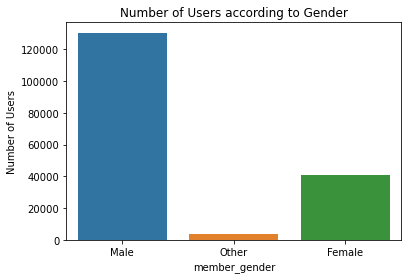

In [27]:
sb.countplot(data=df, x='member_gender');
plt.title("Number of Users according to Gender");
plt.ylabel('Number of Users');


Males are  higher than the womens.

# What is the most type of the users ?

In [28]:
sorted_counts = df['user_type'].value_counts()


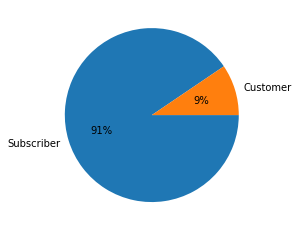

In [29]:
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 0, counterclock = False , autopct='%1.0f%%');


As shown in the pie char subscriber users are higher than customers who use the bikes.



# what  the Most stations  the start is same to end station?

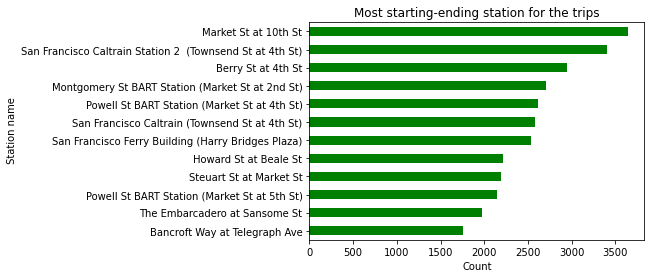

In [30]:
top_station = df['start_station_name'].value_counts()[ :12].sort_values()
top_station.plot(kind = 'barh', color='green')
plt.title('Most starting-ending station for the trips')
plt.xlabel('Count')
plt.ylabel(' Station name');


## What is the most day of the week trips?

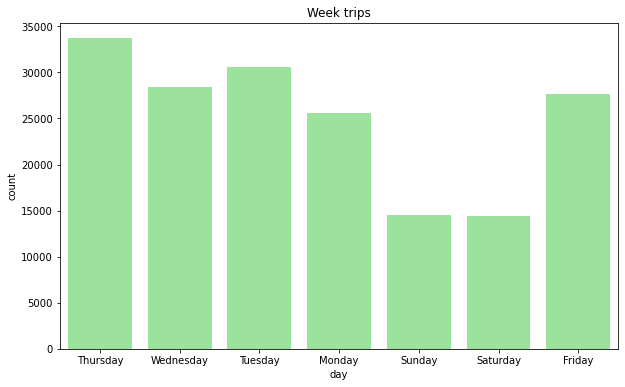

In [31]:
plt.figure(figsize=[10,6])
plt.title('Week trips');
sb.countplot(data=df, x='day', color='lightgreen');

###  when looking at the figure isThursday has the most rides almost 35000

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The number of Males is greater than females.
>
> Subscribers are greater than customers where the start station is the same end station.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>  When performing more analysis on stations where the start station and end station are the same place I find that, more skewed observations when the start station is same to end station, with  histogram of trip 



## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

## What user type spend more time riding bikes ? 



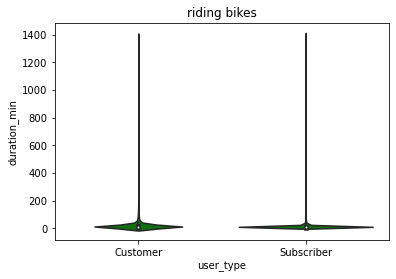

In [32]:
sb.violinplot(data = df, x='user_type', y='duration_min', color= 'green')
plt.title('riding bikes');

## what gender spend more time riding bikes?


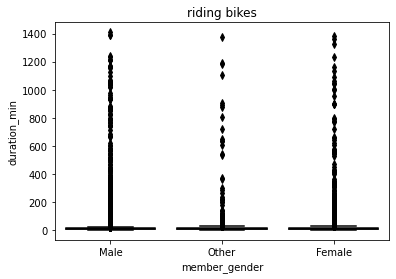

In [33]:
sb.boxplot(data=df, x='member_gender', y='duration_min', color='BLACK')
plt.title('riding bikes');


## Effect of Age on the Trip Duration?

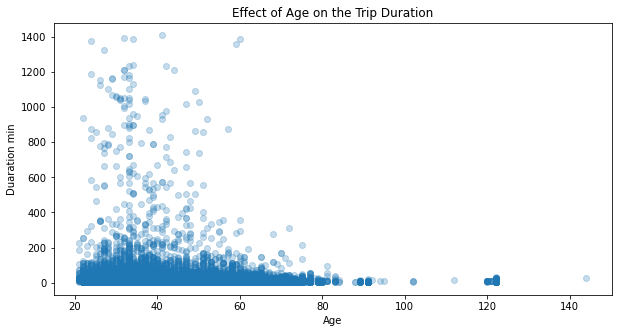

In [34]:
plt.figure(figsize=[10,5])
plt.scatter(data = df,x= 'Age', y='duration_min', alpha = 0.25)
plt.title('Effect of Age on the Trip Duration')
plt.xlabel('Age')
plt.ylabel('Duaration min');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The gender of the user, male or female, does not determine the duration of the trip, while the user's age and gender significantly affect the trip

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I expected that the gender of the cyclist would affect the trip. Despite the higher number of male members than the number of female members. When looking at the group of males and females, we find that the difference between them is little

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.


## clustered bar chart views the higher Trip Duration between males and females the Male Subscribers show the lowest Trip duration compared with female and other Subscriber

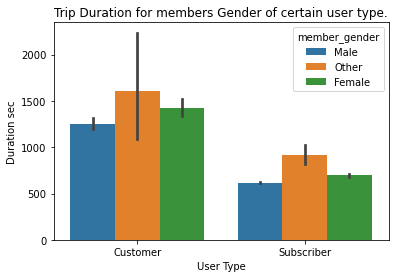

In [35]:
x = sb.barplot(data = df, x = 'user_type', y = 'duration_sec', hue = 'member_gender')
plt.title('Trip Duration for members Gender of certain user type.');
plt.xlabel('User Type');
plt.ylabel('Duration sec');

## Female Customers have the highest duration average and male subscribers have the lowest 

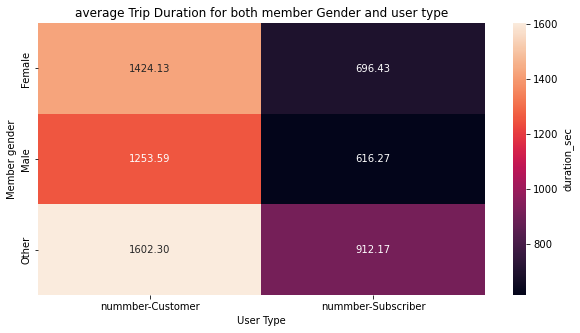

In [36]:
plt.figure(figsize=[10,5])
x = df.groupby(['user_type', 'member_gender']).mean()['duration_sec']
x = x.reset_index(name = 'nummber')
x = x.pivot(index = 'member_gender', columns = 'user_type')                            
sb.heatmap(x, annot = True, fmt = '.2f',cbar_kws = {'label' : 'duration_sec'});
plt.title('average Trip Duration for both member Gender and user type');
plt.xlabel('User Type');
plt.ylabel('Member gender');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> in this section by looking at the relation between Trip Duration sec, User Type, member Gender. The multivariate exploration here showed that there indeed is a positive effect of Gender, but in the dataset there are a large Numbers of Male Users, which fetch a lower effect of gender on Trips Duration sec

### Were there any interesting or surprising interactions between features?

> YES.other gender also has an effect on the duration of the trip && a when find the customers user type has longer on average compared to 'Subscriber' bikers.


## Conclusions
> finally The data consisted of Trip Duration and attributes of approximately 183500 Ford GoBike Users. The attributes included the User Type, Gender, User Birth Date, as well as additional measurements such as Station location,Trip Start Time - End Time. Some Columns were removed from the analysis due to no need for them, age of User is added, and Trip Duration converted from seconds to Minutesfor more readability.